In [1]:
import tensorflow as tf
from numpy.random import RandomState

In [2]:
# 4.1 ReLU
w1 = tf.Variable(tf.random_normal(shape = [2,3], seed = 1, stddev = 1))
w2 = tf.Variable(tf.random_normal(shape = [3,1], seed = 1, stddev = 1))
x = tf.placeholder(tf.float32, shape = (1, 2), name = "x-input")
biases1 = tf.constant([[-0.5,0.1,-0.1]])
biases2 = tf.constant([[0.1]])

a = tf.nn.relu(tf.matmul(x, w1) + biases1)
y = tf.nn.relu(tf.matmul(a, w2) + biases2)
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)
print(sess.run(a, feed_dict={x : [[0.7,0.9]]}))
print(sess.run(y, feed_dict={x : [[0.7,0.9]]}))

[[0.         1.2285427  0.47783247]]
[[1.9551095]]


In [3]:
# 4.2 交叉熵
batch_size = 8
x = tf.placeholder(tf.float32, shape=(None, 2), name="x-input")
y_ = tf.placeholder(tf.float32, shape=(None, 1), name='y-input')
w1= tf.Variable(tf.random_normal([2, 1], stddev=1, seed=1))
y = tf.matmul(x, w1)
cross_entropy = -tf.reduce_mean(y_ * tf.log(tf.clip_by_value(y, 1e-10, 1.0)))

sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)
print(sess.run(y,feed_dict={x:[[0.7,0.9]]}))
print(sess.run(cross_entropy,feed_dict={x:[[0.7,0.9]],y_:[[1.0]]}))

[[0.7682161]]
0.26368424


In [4]:
v = tf.constant([[1.0,2.0,3.0],[4.0,5.0,6.0]])
sess = tf.InteractiveSession()
print(tf.clip_by_value(v,2.5,4.5).eval())

[[2.5 2.5 3. ]
 [4.  4.5 4.5]]


In [5]:
v1 = tf.constant([[1.0,2.0],[3.0,4.0]])
v2 = tf.constant([[1.0,2.0],[3.0,4.0]])
sess = tf.InteractiveSession()
print((v1*v2).eval())
print(tf.matmul(v1, v2).eval())

[[ 1.  4.]
 [ 9. 16.]]
[[ 7. 10.]
 [15. 22.]]


In [6]:
print(tf.reduce_mean(v).eval())

3.5


In [7]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y)

In [8]:
# MSE
y_ = tf.placeholder(tf.float32, shape=(None, 1), name='y-input')
w1= tf.Variable(tf.random_normal([2, 1], stddev=1, seed=1))
x = tf.placeholder(tf.float32, shape=(1,2))
y = tf.matmul(x, w1)

mse = tf.reduce_mean(tf.square(y_ - y))
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)
sess.run(mse,feed_dict={x:[[0.7,0.9]], y_:[[1.0]]})

0.05372379

In [9]:
# 定义神经网络的相关参数和变量
batch_size = 8
x = tf.placeholder(tf.float32, shape=(None, 2), name="x-input")
y_ = tf.placeholder(tf.float32, shape=(None, 1), name='y-input')
w1= tf.Variable(tf.random_normal([2, 1], stddev=1, seed=1))
y = tf.matmul(x, w1)

# 设置自定义的损失函数
# 定义损失函数使得预测少了的损失大，于是模型应该偏向多的方向预测。
loss_less = 10
loss_more = 1
loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * loss_more, (y_ - y) * loss_less))
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

# 生成模拟数据集
rdm = RandomState(1)
X = rdm.rand(128,2)
Y = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1, x2) in X]

# 训练模型
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i*batch_size) % 128
        end = (i*batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            print("After %d training step(s), w1 is: " % (i))
            print(sess.run(w1), "\n")
    print("Final w1 is: \n", sess.run(w1))

After 0 training step(s), w1 is: 
[[-0.81031823]
 [ 1.4855988 ]] 



After 1000 training step(s), w1 is: 
[[0.01247112]
 [2.1385448 ]] 



After 2000 training step(s), w1 is: 
[[0.45567414]
 [2.1706066 ]] 



After 3000 training step(s), w1 is: 
[[0.69968724]
 [1.8465308 ]] 



After 4000 training step(s), w1 is: 
[[0.89886665]
 [1.2973602 ]] 



Final w1 is: 
 [[1.019347 ]
 [1.0428089]]


In [10]:
v1 = tf.constant([1.0,2.0,3.0,4.0])
v2 = tf.constant([4.0,3.0,2.0,1.0])
sess = tf.Session()
print(sess.run(tf.greater(v1,v2)))
print(sess.run(tf.where(tf.greater(v1,v2), v1, v2)))

[False False  True  True]
[4. 3. 3. 4.]


In [12]:
# 重新定义损失函数，使得预测多了的损失大，于是模型应该偏向少的方向预测
loss_less = 1
loss_more = 10
loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * loss_more, (y_ - y) * loss_less))
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i*batch_size) % 128
        end = (i*batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            print("After %d training step(s), w1 is: " % (i))
            print(sess.run(w1), "\n")
    print("Final w1 is: \n", sess.run(w1))

After 0 training step(s), w1 is: 
[[-0.8123182]
 [ 1.4835987]] 



After 1000 training step(s), w1 is: 
[[0.18643527]
 [1.0739334 ]] 



After 2000 training step(s), w1 is: 
[[0.95444274]
 [0.98088616]] 



After 3000 training step(s), w1 is: 
[[0.9557403]
 [0.9806633]] 



After 4000 training step(s), w1 is: 
[[0.9546602 ]
 [0.98135227]] 



Final w1 is: 
 [[0.9552581]
 [0.9813394]]


In [15]:
# 定义损失函数为MSE
loss = tf.losses.mean_squared_error(y, y_)
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i*batch_size) % 128
        end = (i*batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            print("After %d training step(s), w1 is: " % (i))
            print(sess.run(w1), "\n")
    print("Final w1 is: \n", sess.run(w1))

After 0 training step(s), w1 is: 
[[-0.8113182]
 [ 1.4845988]] 



After 1000 training step(s), w1 is: 
[[-0.8113182]
 [ 1.4845988]] 



After 2000 training step(s), w1 is: 
[[-0.8113182]
 [ 1.4845988]] 



After 3000 training step(s), w1 is: 
[[-0.8113182]
 [ 1.4845988]] 



After 4000 training step(s), w1 is: 
[[-0.8113182]
 [ 1.4845988]] 



Final w1 is: 
 [[-0.8113182]
 [ 1.4845988]]


In [29]:
# 4.3 神经网络优化
# SGD(batch_size)
batch_size = 8

x = tf.placeholder(tf.float32, shape = (None, 2), name = "x-input" )
y_ = tf.placeholder(tf.float32, shape = (None, 1), name = "y-input")
w1= tf.Variable(tf.random_normal([2, 1], stddev=1, seed=1))
y = tf.matmul(x, w1)

loss = tf.losses.mean_squared_error(y, y_)
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

rdm = RandomState(1)
X = rdm.rand(128,2)
Y = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1, x2) in X]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    STEPS = 5000
    for i in range(STEPS):
        start = (i * batch_size) % 128
        end = (i * batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x:X[start:end],y_: Y[start:end]})
        if i % 1000 == 0:
            print("After %d training steps, w1 is: " % (i))
            print(sess.run(w1),"\n")
    print("Final w1 is : \n", sess.run(w1))

After 0 training steps, w1 is: 
[[-0.81031823]
 [ 1.4855988 ]] 



After 1000 training steps, w1 is: 
[[-0.13337609]
 [ 1.8130922 ]] 



After 2000 training steps, w1 is: 
[[0.321903 ]
 [1.5246348]] 



After 3000 training steps, w1 is: 
[[0.67850214]
 [1.2529727 ]] 



After 4000 training steps, w1 is: 
[[0.89474  ]
 [1.0859823]] 



Final w1 is : 
 [[0.9743756]
 [1.0243336]]


In [44]:
# 4.4.1 学习率
#decayed_learning_rate = \
#    learning_rate * decay_rate ^ (global_step / decay_steps)

#学习率为1时 x在5和-5之间震荡
train_step = 10
learning_rate = 1
x = tf.Variable(tf.constant(5,dtype=tf.float32), name = "x")
y = tf.square(x)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(y)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(train_step):
        sess.run(train_op)
        x_value = sess.run(x)
        print("After %s iteration(s): x%s is %f."% (i+1, i+1, x_value))

After 1 iteration(s): x1 is -5.000000.
After 2 iteration(s): x2 is 5.000000.
After 3 iteration(s): x3 is -5.000000.
After 4 iteration(s): x4 is 5.000000.
After 5 iteration(s): x5 is -5.000000.
After 6 iteration(s): x6 is 5.000000.
After 7 iteration(s): x7 is -5.000000.
After 8 iteration(s): x8 is 5.000000.
After 9 iteration(s): x9 is -5.000000.
After 10 iteration(s): x10 is 5.000000.


In [45]:
# 学习率为0.001的时候，下降速度过慢
TRAINING_STEPS = 1000
LEARNING_RATE = 0.001
x = tf.Variable(tf.constant(5, dtype=tf.float32), name="x")
y = tf.square(x)

train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(y)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(TRAINING_STEPS):
        sess.run(train_op)
        if i % 100 == 0: 
            x_value = sess.run(x)
            print("After %s iteration(s): x%s is %f."% (i+1, i+1, x_value))

After 1 iteration(s): x1 is 4.990000.
After 101 iteration(s): x101 is 4.084646.
After 201 iteration(s): x201 is 3.343555.
After 301 iteration(s): x301 is 2.736923.
After 401 iteration(s): x401 is 2.240355.
After 501 iteration(s): x501 is 1.833880.
After 601 iteration(s): x601 is 1.501153.
After 701 iteration(s): x701 is 1.228794.
After 801 iteration(s): x801 is 1.005850.
After 901 iteration(s): x901 is 0.823355.


In [47]:
# 使用指数衰减的学习率
TRAINING_STEPS = 100
global_step = tf.Variable(0)
LEARNING_RATE = tf.train.exponential_decay(0.1, global_step, 1, 0.96, staircase=True)

x = tf.Variable(tf.constant(5, dtype=tf.float32), name="x")
y = tf.square(x)
train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(y, global_step=global_step)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(TRAINING_STEPS):
        sess.run(train_op)
        if i % 10 == 0:
            LEARNING_RATE_value = sess.run(LEARNING_RATE)
            x_value = sess.run(x)
            print("After %s iteration(s): x%s is %f, learning rate is %f."% (i+1, i+1, x_value, LEARNING_RATE_value))

After 1 iteration(s): x1 is 4.000000, learning rate is 0.096000.
After 11 iteration(s): x11 is 0.690561, learning rate is 0.063824.
After 21 iteration(s): x21 is 0.222583, learning rate is 0.042432.
After 31 iteration(s): x31 is 0.106405, learning rate is 0.028210.
After 41 iteration(s): x41 is 0.065548, learning rate is 0.018755.
After 51 iteration(s): x51 is 0.047625, learning rate is 0.012469.
After 61 iteration(s): x61 is 0.038558, learning rate is 0.008290.
After 71 iteration(s): x71 is 0.033523, learning rate is 0.005511.
After 81 iteration(s): x81 is 0.030553, learning rate is 0.003664.
After 91 iteration(s): x91 is 0.028727, learning rate is 0.002436.


In [63]:
# 4.4.2 过拟合问题
# w = tf.Variable(tf.random_normal([2,1],stddev = 1, seed = 1))
#vy = tf.matmul(x, w)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #tf.reduce_mean(tf.square(y_-y))+tf.contrib.layers.l2_regularizer(0.5)(w)

In [53]:
weights = tf.constant([[1.0,-2.0],[-3.0, 4.0]])
with tf.Session() as sess:
    print(sess.run(tf.contrib.layers.l2_regularizer(.5)(weights)))
    print(sess.run(tf.contrib.layers.l1_regularizer(.5)(weights)))

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


7.5
5.0


In [67]:
lamda = tf.constant(0.5)
def get_weight(shape, lamda):
    w = tf.Variable(tf.random_normal(shape=[None,2]))
    var = tf.Variable(tf.random_normal(shape), dtype = tf.float32)

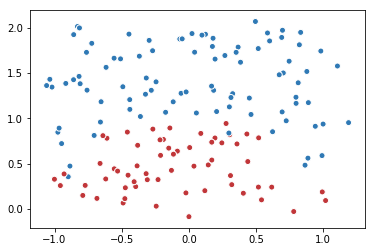

In [76]:
# 生成模拟数据集
import matplotlib.pyplot as plt
import numpy as np

data = []
label = []
np.random.seed(0)

# 以原点为圆心，半径为1的圆把散点划分成红蓝两部分，并加入随机噪音。
for i in range(150):
    x1 = np.random.uniform(-1,1)
    x2 = np.random.uniform(0,2)
    if x1**2 + x2**2 <= 1:
        data.append([np.random.normal(x1, 0.1),np.random.normal(x2,0.1)])
        label.append(0)
    else:
        data.append([np.random.normal(x1, 0.1), np.random.normal(x2, 0.1)])
        label.append(1)
        
data = np.hstack(data).reshape(-1,2)
label = np.hstack(label).reshape(-1, 1)
plt.scatter(data[:,0], data[:,1], c=np.squeeze(label),cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
plt.show()

In [77]:
def get_weight(shape, lambda1):
    var = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(lambda1)(var))
    return var

After 0 steps, mse_loss: 80.271271


After 2000 steps, mse_loss: 3.656363


After 4000 steps, mse_loss: 1.296850


After 6000 steps, mse_loss: 1.020152


After 8000 steps, mse_loss: 1.019689


After 10000 steps, mse_loss: 1.019691


After 12000 steps, mse_loss: 1.019694


After 14000 steps, mse_loss: 1.019690


After 16000 steps, mse_loss: 1.019691


After 18000 steps, mse_loss: 1.019687


After 20000 steps, mse_loss: 1.019690


After 22000 steps, mse_loss: 1.019690


After 24000 steps, mse_loss: 1.019691


After 26000 steps, mse_loss: 1.019689


After 28000 steps, mse_loss: 1.019693


After 30000 steps, mse_loss: 1.019694


After 32000 steps, mse_loss: 1.019696


After 34000 steps, mse_loss: 1.019691


After 36000 steps, mse_loss: 1.019685


After 38000 steps, mse_loss: 1.019691


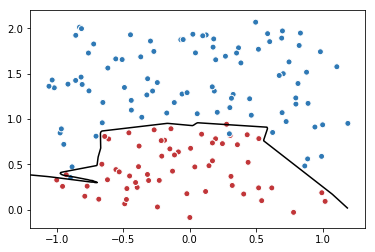

In [124]:
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))
sample_size = len(data)

# 每层节点的个数
layer_dimension = [2,10,5,3,1]
# 神经网络层数
n_layers = len(layer_dimension)

# 该变量维护前向传播最深层的节点，初始值为x输入
cur_layer = x
# 当前的节点数
in_dimension = layer_dimension[0]

# 循环生成5层网络结构
for i in range(1, n_layers):
    # 下一层节点数
    out_dimension = layer_dimension[i]
    # 生成当前层的权重，并计算L2正则损失
    weight = get_weight([in_dimension, out_dimension], 0.003)
    bias = tf.Variable(tf.constant(0.1, shape=[out_dimension]))
    # 使用ReLU激活函数
    cur_layer = tf.nn.relu(tf.matmul(cur_layer, weight) + bias)
    # 下一层的节点个数，并进入下一层
    in_dimension = layer_dimension[i]

y= cur_layer

# 均方误差损失函数
mse_loss = tf.reduce_sum(tf.square(y_ - y))

# 将均方误差损失函数加入损失集合
tf.add_to_collection('losses', mse_loss)
loss = tf.add_n(tf.get_collection('losses'))

# 训练不带正则的损失函数
# 定义训练的目标函数mse_loss，训练次数及训练模型
train_op = tf.train.AdamOptimizer(0.001).minimize(mse_loss)
TRAINING_STEPS = 40000

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(TRAINING_STEPS):
        sess.run(train_op, feed_dict={x: data, y_: label})
        if i % 2000 == 0:
            print("After %d steps, mse_loss: %f" % (i,sess.run(mse_loss, feed_dict={x: data, y_: label})))

    # 画出训练后的分割曲线       
    xx, yy = np.mgrid[-1.2:1.2:.01, -0.2:2.2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y, feed_dict={x:grid})
    probs = probs.reshape(xx.shape)

plt.scatter(data[:,0], data[:,1], c=np.squeeze(label),cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
plt.show()

In [123]:
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))
sample_size = len(data)

# 每层节点的个数
layer_dimension = [2,10,5,3,1]
# 神经网络层数
n_layers = len(layer_dimension)

# 该变量维护前向传播最深层的节点，初始值为x输入
cur_layer = x
# 当前的节点数
in_dimension = layer_dimension[0]

# 循环生成5层网络结构
for i in range(1, n_layers):
    # 下一层节点数
    out_dimension = layer_dimension[i]
    # 生成当前层的权重，并计算L2正则损失
    weight = get_weight([in_dimension, out_dimension], 0.003)
    bias = tf.Variable(tf.constant(0.1, shape=[out_dimension]))
    # 使用ReLU激活函数
    cur_layer = tf.nn.relu(tf.matmul(cur_layer, weight) + bias)
    # 下一层的节点个数，并进入下一层
    in_dimension = layer_dimension[i]

y= cur_layer

# 均方误差损失函数
mse_loss = tf.reduce_sum(tf.square(y_ - y))

# 将均方误差损失函数加入损失集合
tf.add_to_collection('losses', mse_loss)
loss = tf.add_n(tf.get_collection('losses'))

# 定义训练的目标函数loss，训练次数及训练模型
train_op = tf.train.AdamOptimizer(0.001).minimize(loss)
TRAINING_STEPS = 40000

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(TRAINING_STEPS):
        sess.run(train_op, feed_dict={x: data, y_: label})
        if i % 2000 == 0:
            print("After %d steps, loss: %f" % (i, sess.run(loss, feed_dict={x: data, y_: label})))

    # 画出训练后的分割曲线       
    xx, yy = np.mgrid[-1:1:.01, 0:2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y, feed_dict={x:grid})
    probs = probs.reshape(xx.shape)
    
plt.scatter(data[:,0], data[:,1], c=np.squeeze(label),cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
plt.show()

InvalidArgumentError: Shape [-1,2] has negative dimensions
	 [[Node: Placeholder_13 = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_13', defined at:
  File "C:\Users\adward\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\adward\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\adward\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\adward\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\adward\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\adward\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\adward\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\adward\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\adward\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\adward\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\adward\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\adward\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\adward\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\adward\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\adward\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\adward\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\adward\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\adward\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\adward\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\adward\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-93-9a5afa25b509>", line 1, in <module>
    x = tf.placeholder(tf.float32, shape=(None, 2))
  File "C:\Users\adward\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\adward\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\adward\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\adward\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\adward\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,2] has negative dimensions
	 [[Node: Placeholder_13 = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [125]:
# 4.4.3 滑动平均模型
v1 = tf.Variable(0, dtype=tf.float32)
step = tf.Variable(0, trainable=False)
ema = tf.train.ExponentialMovingAverage(0.99, step)
maintain_averages_op = ema.apply([v1])

In [127]:
with tf.Session() as sess:
    
    # 初始化
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run([v1, ema.average(v1)]))
    
    # 更新变量v1的取值
    sess.run(tf.assign(v1, 5))
    sess.run(maintain_averages_op)
    print(sess.run([v1, ema.average(v1)]) )
    
    # 更新step和v1的取值
    sess.run(tf.assign(step, 10000))  
    sess.run(tf.assign(v1, 10))
    sess.run(maintain_averages_op)
    print(sess.run([v1, ema.average(v1)]) )      
    
    # 更新一次v1的滑动平均值
    sess.run(maintain_averages_op)
    print(sess.run([v1, ema.average(v1)]))

[0.0, 0.0]


[5.0, 4.5]


[10.0, 4.555]
[10.0, 4.60945]
